<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Загрузка-и-обзор-данных" data-toc-modified-id="Загрузка-и-обзор-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Загрузка и обзор данных</a></span></li><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Описание данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Подготовка-признаков" data-toc-modified-id="Подготовка-признаков-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Подготовка признаков</a></span></li></ul></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Логистическая регрессия</a></span></li><li><span><a href="#Дерево-решений" data-toc-modified-id="Дерево-решений-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Дерево решений</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Случайный лес</a></span></li><li><span><a href="#Catboost" data-toc-modified-id="Catboost-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Catboost</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Дисбаланс-классов" data-toc-modified-id="Дисбаланс-классов-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Дисбаланс классов</a></span><ul class="toc-item"><li><span><a href="#Взвешивание-классов" data-toc-modified-id="Взвешивание-классов-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Взвешивание классов</a></span></li><li><span><a href="#Upsampling" data-toc-modified-id="Upsampling-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Upsampling</a></span></li><li><span><a href="#Downsampling" data-toc-modified-id="Downsampling-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Downsampling</a></span></li><li><span><a href="#Изменение-порога" data-toc-modified-id="Изменение-порога-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Изменение порога</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Отток клиентов банка

Из "Бета-Банка" стали уходить клиенты. Предоставлены исторические данные о поведении клиентов и расторжении договоров.

**Цель** - построить модель для прогноза: уйдёт клиент в ближайшее время или нет.

**Ход исследования**

1. Загрузить и подготовить данные.
2. Исследовать баланс классов, обучить модель без учёта дисбаланса. Сделать выводы.
3. Улучшить качество модели, учитывая дисбаланс классов. Обучить различные модели и выбрать лучшую.
4. Оценить качество модели с помощью метрик: F1-мера (минимум 0,59) и AUC-ROC. 
5. Провести тестирование модели на тестовой выборке.

## Подготовка данных

### Загрузка и обзор данных

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# для обучения моделей
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler 
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import shuffle
from scipy import interpolate

import warnings
warnings.filterwarnings('ignore')

In [2]:
# постоянные параметры
rnd_state = 12345

In [3]:
df = pd.read_csv('https://code.s3.yandex.net/datasets/Churn.csv')

In [4]:
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


### Описание данных

Признаки
- `RowNumber` — индекс строки в данных
- `CustomerId` — уникальный идентификатор клиента
- `Surname` — фамилия
- `CreditScore` — кредитный рейтинг
- `Geography` — страна проживания
- `Gender` — пол
- `Age` — возраст
- `Tenure` — сколько лет человек является клиентом банка
- `Balance` — баланс на счёте
- `NumOfProducts` — количество продуктов банка, используемых клиентом
- `HasCrCard` — наличие кредитной карты
- `IsActiveMember` — активность клиента
- `EstimatedSalary` — предполагаемая зарплата

Целевой признак
- `Exited` — факт ухода клиента

### Предобработка данных

Для удобства переименовываю столбцы - убираю верблюжий регистр. Столбец `RowNumber` - индекс строки - не нужен для исследования и обучения, удаляю его. Фамилия тоже не нужна.

In [6]:
df = df.drop(columns=['RowNumber', 'Surname'], axis=1)

In [7]:
df.head()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [8]:
len(df['CustomerId'].unique())

10000

Все ID клиентов уникальны, значит дубликатов в таблице нет.

In [9]:
df.columns = ['customer_id', 'credit_score', 'geography', 'gender', 'age', 'tenure', 'balance', 'num_of_products', 'has_cr_card', 'is_active', 'salary', 'exited']

In [10]:
df.head()

,customer_id,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active,salary,exited
0,15634602,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


Значения баланса и заработной платы можно округлить и перевести в целые числа.

In [11]:
df['balance'] = np.ceil(df['balance'])
df['salary'] = np.ceil(df['salary'])
df[['balance', 'salary']] = df[['balance', 'salary']].astype('int64')

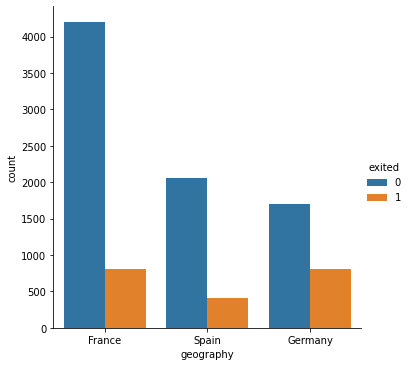

In [12]:
sns.catplot(data=df, x='geography', kind='count', hue='exited')
plt.show()

Больше всего клиентов во Франции. Интересно, что в Германии клиентов намного меньше, но ушедших практически столько же, сколько во Франции.

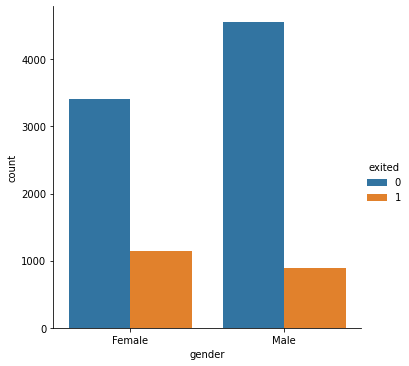

In [13]:
sns.catplot(data=df, x='gender', kind='count', hue='exited')
plt.show()

Среди клиентов больше мужчин, но среди ушедших клиентов - больше женщин.

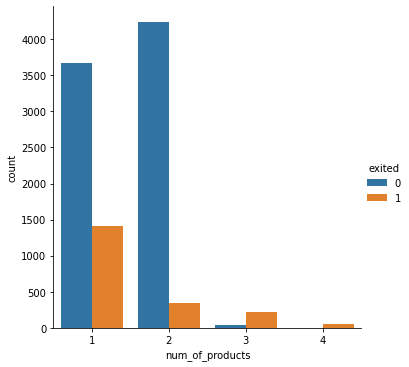

In [14]:
sns.catplot(data=df, x='num_of_products', kind='count', hue='exited')
plt.show()

Почему-то клиенты, использующие 3 и 4 продукта в банке, в большинстве своём перестали пользоваться его услугами. В то же время, судя по отношению ушедших к оставшимся, самые довольные - клиенты с двумя продуктами.

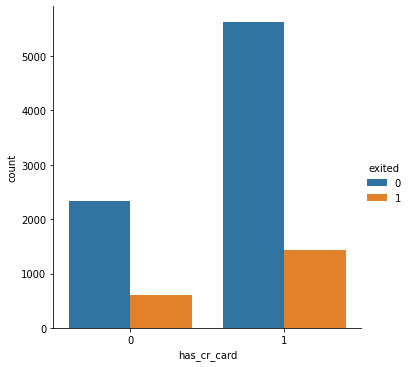

In [15]:
sns.catplot(data=df, x='has_cr_card', kind='count', hue='exited')
plt.show()

Большинство клиентов пользуются кредитной картой.

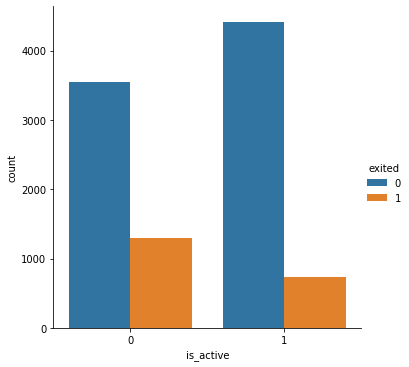

In [16]:
sns.catplot(data=df, x='is_active', kind='count', hue='exited')
plt.show()

Среди неактивных клиентов больше тех, кто ушёл, что логично.

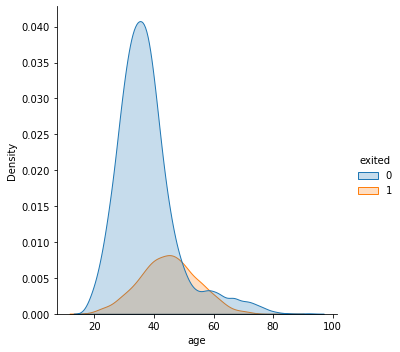

In [17]:
sns.displot(df, x="age", hue="exited", kind="kde", fill=True)
plt.show()

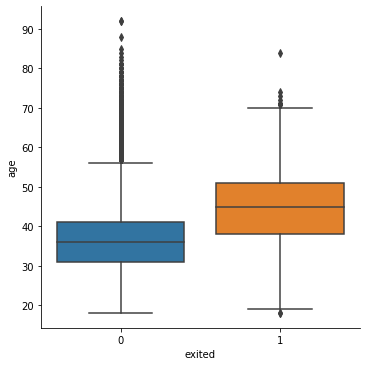

In [18]:
sns.catplot(data=df, x="exited", y="age", kind="box")
plt.show()

Средний возраст ушедших клиентов больше, чем оставшихся. 

In [19]:
df['age'].describe()

count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: age, dtype: float64

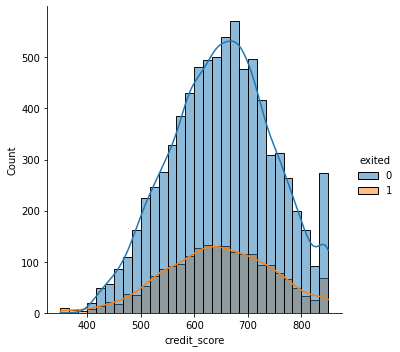

In [20]:
sns.displot(df, x="credit_score", hue="exited", bins=30, kde=True)
plt.show()

Распределение кредитного рейтинга похоже для ушедших и действующих клиентов. Есть всплеск количества клиентов с высоким значением рейтинга. Клиенты с рейтингом ниже 400 ушли из банка.

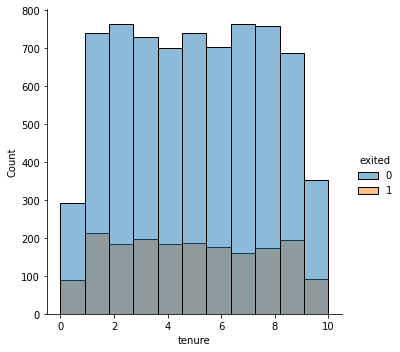

In [21]:
sns.displot(df, x="tenure", hue="exited", bins=11)
plt.show()

Распределение ушедших клиентов среди клиентов с различным стажем примерно одинаковое.

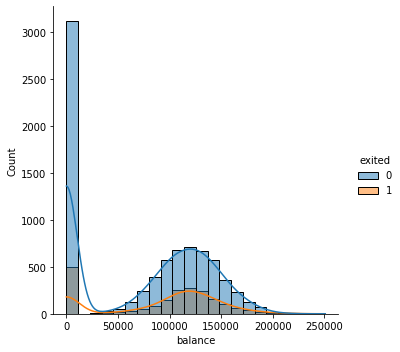

In [22]:
sns.displot(df, x="balance", hue="exited", kde=True)
plt.show()

In [23]:
df['balance'].describe()

count     10000.000000
mean      76486.202500
std       62397.623623
min           0.000000
25%           0.000000
50%       97199.000000
75%      127644.750000
max      250899.000000
Name: balance, dtype: float64

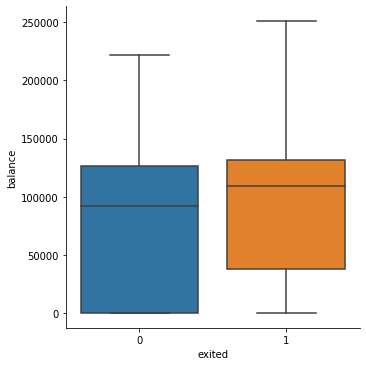

In [24]:
sns.catplot(data=df, x="exited", y="balance", kind="box")
plt.show()

In [25]:
np.mean(df['balance'] == 0)

0.3617

Всплеск в нулевых значениях баланса. Клиентов с отсутствием денег на счету около 36%. Посмотрим, что это за клиенты


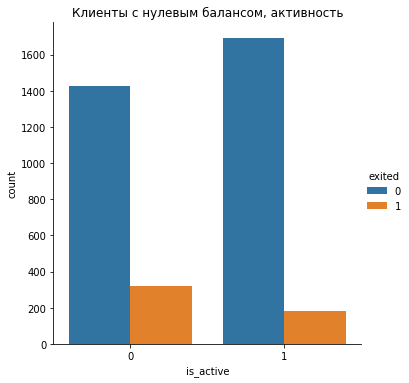

In [26]:
sns.catplot(data=df[df['balance'] == 0] , x='is_active', kind='count', hue='exited')
plt.title('Клиенты с нулевым балансом, активность')
plt.show()

Активность клиентов с нулевым балансом не особо отличается от общей картины

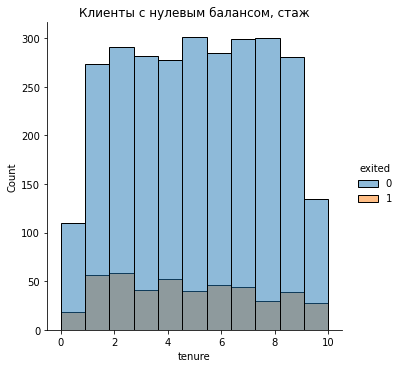

In [27]:
sns.displot(df[df['balance'] == 0], x="tenure", hue="exited", bins=11)
plt.title('Клиенты с нулевым балансом, стаж')
plt.show()

Распределение по стажу в выборке клиентов с нулевым балансом похоже на общую картину, хотя здесь количество ушедших клиентов имеет тенденцию к снижению с увеличением стажа.

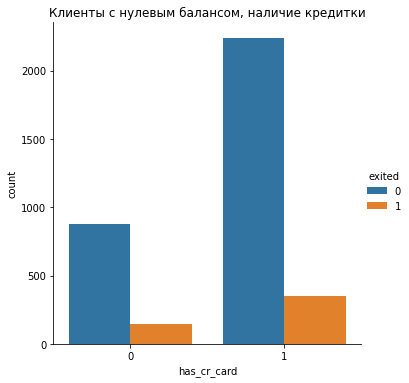

In [28]:
sns.catplot(data=df[df['balance'] == 0], x='has_cr_card', kind='count', hue='exited')
plt.title('Клиенты с нулевым балансом, наличие кредитки')
plt.show()

Большинство клиентов с нулевым балансом пользуются кредитными картами, то есть возможно они пользуются услугами банка ради кредитной карты, а деньги на счету имеют в другом банке.

Тем не менее есть и такие клиенты, которые кредитной картой не пользуются, и баланс у них на нуле.

In [29]:
df[(df['balance'] == 0) & (df['tenure'].isna())]['balance'].count()

334

In [30]:
df[(df['balance'] == 0) & (df['tenure'].isna()) & (df['exited'] == 1)]['balance'].count()

48

In [31]:
df[(df['balance'] == 0) & (df['tenure'].isna()) & (df['has_cr_card'] == 0)]['balance'].count()

99

Не знаю, что делать с теми клиентами, у которых баланс на нуле. Несмотря на всплеск количества таких клиентов на диаграмме, удалять их не буду.

Обрабатываю пропуски в столбце `tenure`. В первой версии они были заполнены нулём (предположение, что количество лет не указано для "свежих" клиентов, которые недавно начали пользоваться услугами банка).

Пробую другие варианты.

In [32]:
df.head()

,customer_id,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active,salary,exited
0,15634602,619,France,Female,42,2.0,0,1,1,1,101349,1
1,15647311,608,Spain,Female,41,1.0,83808,1,0,1,112543,0
2,15619304,502,France,Female,42,8.0,159661,3,1,0,113932,1
3,15701354,699,France,Female,39,1.0,0,2,0,0,93827,0
4,15737888,850,Spain,Female,43,2.0,125511,1,1,1,79085,0


In [33]:
df['tenure'].isna().mean()

0.0909

Доля пропусков - около 9%

In [34]:
df.query('tenure.isna()')['gender'].value_counts()

Male      483
Female    426
Name: gender, dtype: int64

In [35]:
df.query('tenure.isna()')['geography'].value_counts()

France     464
Spain      229
Germany    216
Name: geography, dtype: int64

Смотрю средние значения и медиану для стажа клиента по странам.

In [36]:
df.pivot_table(index='geography', values='tenure', aggfunc=['mean', 'median', 'count'])

,mean,median,count
,tenure,tenure,tenure
geography,,,
France,5.003956,5.0,4550
Germany,4.981247,5.0,2293
Spain,5.001779,5.0,2248


Средний стаж для всех стран примерно одинаков - 5 лет. Посмотрю средние значения по другим группам.

In [37]:
(df
 .query('tenure.isna()')
 .pivot_table(columns='geography', values='age', aggfunc=['median', 'mean', 'count'])
)

median                  mean                        count          \
geography France Germany Spain  France    Germany      Spain France Germany   
age         37.0    37.5  38.0  38.125  39.041667  39.336245    464     216   

                 
geography Spain  
age         229

Средний возраст для клиентов с пропуском в стаже по странам похож и составляет 37-39 лет.

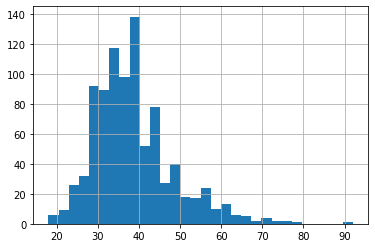

In [38]:
df.query('tenure.isna()')['age'].hist(bins=30)
plt.show()

Распределение по возрасту для клиентов с пропуском в стаже примерно такое же, как и для клиентов без пропуска, ничего особенного не вижу.

Добавляю в таблицу столбец с разделением на категории по возрасту. Возможно удастся получить различный средний стаж для этих категорий и использовать его для заполнения пропусков.

In [39]:
# функция для присвоения категории по возрасту
def age_cat(age):
    if age < 21:
        return('18-20')
    if age < 31:
        return('21-30')
    if age < 41:
        return('31-40')
    if age < 51:
        return('41-50')
    if age < 61:
        return('51-60')
    if age > 60:
        return('61-92')

In [40]:
age_cat(92)

'61-92'

In [41]:
df['age_category'] = df['age'].apply(age_cat)

In [42]:
df.pivot_table(index='age_category', values='tenure', aggfunc=['mean', 'median', 'count'])

,mean,median,count
,tenure,tenure,tenure
age_category,,,
18-20,5.072289,5.0,83
21-30,5.065698,5.0,1720
31-40,5.007234,5.0,4009
41-50,4.954781,5.0,2123
51-60,4.976487,5.0,723
61-92,4.870670,5.0,433


Для различных категорий возраста та же самая картина - одинаковая медиана и почти одинаковое среднее - 5 лет. Пробовала немного другую разбивку на категории (меняла диапазоны), ничего не изменилось.

<AxesSubplot:>

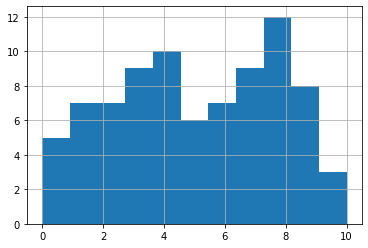

In [43]:
df.query('age < 21')['tenure'].hist(bins=11)

Что самое странное, даже в категории от 18 до 20 лет средний стаж - тоже 5 лет. На графике видно, что среди таких молодых клиентов есть и те, у кого стаж 10 лет. Мне это странно, но детям в принципе можно сделать карту в банке, возможно это учитывалось как стаж. В реальной жизни можно было бы спросить у поставщиков данных, но сейчас не вижу другого выхода, кроме как удивиться и пойти дальше.

In [44]:
df['tenure'].describe()

count    9091.000000
mean        4.997690
std         2.894723
min         0.000000
25%         2.000000
50%         5.000000
75%         7.000000
max        10.000000
Name: tenure, dtype: float64

Ещё одна попытка - посмотрю средний стаж в связи с категориями по кредитному рейтингу.

<AxesSubplot:>

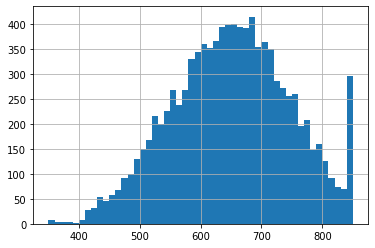

In [45]:
df['credit_score'].hist(bins=50)

In [46]:
def credit_score_cat(score):
    if score > 818:
        return('A')
    if score > 700:
        return('B')
    if score > 600:
        return('C')
    if score > 500:
        return('D')
    if score < 501:
        return('E')

In [47]:
df['credit_score_category'] = df['credit_score'].apply(credit_score_cat)

In [48]:
df.pivot_table(index='credit_score_category', values='tenure', aggfunc=['mean', 'median', 'count'])

,mean,median,count
,tenure,tenure,tenure
credit_score_category,,,
A,4.949622,5.0,397
B,5.039868,5.0,2433
C,5.001721,5.0,3486
D,4.929449,5.0,2197
E,5.088235,5.0,578


И это ничего не дало. Опять по всем категориям одинаковая медиана и примерно одинаковое среднее. Сдаюсь и заполняю все пропуски этим средним - 5 лет.

Было бы конечно здорово сделать отдельную модель для заполнения пропусков, но это пока слишком круто для меня, провожусь с этим долго.

In [49]:
df['tenure'] = df['tenure'].fillna(5).astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   customer_id            10000 non-null  int64 
 1   credit_score           10000 non-null  int64 
 2   geography              10000 non-null  object
 3   gender                 10000 non-null  object
 4   age                    10000 non-null  int64 
 5   tenure                 10000 non-null  int32 
 6   balance                10000 non-null  int64 
 7   num_of_products        10000 non-null  int64 
 8   has_cr_card            10000 non-null  int64 
 9   is_active              10000 non-null  int64 
 10  salary                 10000 non-null  int64 
 11  exited                 10000 non-null  int64 
 12  age_category           10000 non-null  object
 13  credit_score_category  10000 non-null  object
dtypes: int32(1), int64(9), object(4)
memory usage: 1.0+ MB


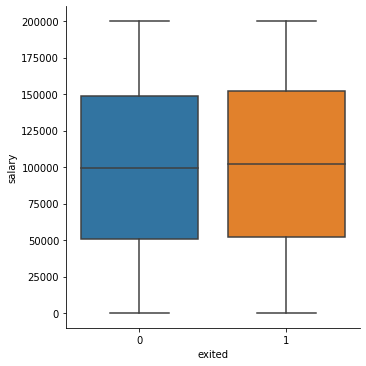

In [50]:
sns.catplot(data=df, x="exited", y="salary", kind="box")
plt.show()

In [51]:
df['salary'].describe()

count     10000.00000
mean     100090.73650
std       57510.49455
min          12.00000
25%       51002.75000
50%      100194.50000
75%      149388.75000
max      199993.00000
Name: salary, dtype: float64

Распределение данных о заработной плате практически одинаково для ушедших и оставшихся клиентов.

### Подготовка признаков

Делю данные на выборки, отбрасывая при этом ненужные.

In [105]:
target = df['exited']
features = df.drop(['exited', 'customer_id', 'age_category', 'credit_score_category'], axis=1)

In [52]:
features_train, features_test, target_train, target_test = train_test_split(
     features, target, test_size=0.2, random_state=12345)

features_train, features_valid, target_train, target_valid = train_test_split(
    features_train, target_train, test_size=0.25, random_state=12345)

In [53]:
features_train.shape

(6000, 10)

In [54]:
features_valid.shape

(2000, 10)

In [55]:
features_test.shape

(2000, 10)

Подготавливаю признаки. Кодирую категориальные признаки `geography` и `gender`, численные признаки масштабирую. 

In [56]:
features_train.head()

,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active,salary
492,639,France,Female,38,4,81551,2,0,1,118975
6655,554,France,Male,44,5,85305,1,1,1,58077
4287,714,Germany,Male,53,1,99142,1,1,1,72497
42,556,France,Female,61,2,117420,1,1,1,94154
8178,707,France,Female,46,7,127477,2,1,1,146012


In [57]:
cat_cols = ['geography', 'gender']
num_cols = ['credit_score', 'age', 'balance', 'tenure', 'salary', 'num_of_products']

In [58]:
ohe = OneHotEncoder(sparse=False, drop='first').fit(features_train[cat_cols])

scaler = StandardScaler()
scaler.fit(features_train[num_cols])

StandardScaler()

In [59]:
for df_name in [features_train, features_valid, features_test]:
    df_name[ohe.get_feature_names()] = ohe.transform(df_name[cat_cols])
    df_name[num_cols] = scaler.transform(df_name[num_cols])
    df_name.drop(columns=cat_cols, inplace=True)

In [60]:
display(features_train.head())
display(features_train.shape)

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active,salary,x0_Germany,x0_Spain,x1_Male
492,-0.134048,-0.078068,-0.369113,0.076159,0.816929,0,1,0.331566,0.0,0.0,0.0
6655,-1.010798,0.494555,-0.007415,0.136397,-0.896909,1,1,-0.727858,0.0,0.0,1.0
4287,0.639554,1.353490,-1.454209,0.358431,-0.896909,1,1,-0.476998,1.0,0.0,1.0
42,-0.990168,2.116987,-1.092511,0.651728,-0.896909,1,1,-0.100237,0.0,0.0,0.0
8178,0.567351,0.685430,0.715982,0.813107,0.816929,1,1,0.801921,0.0,0.0,0.0


(6000, 11)

In [61]:
display(features_valid.head())
display(features_valid.shape)

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active,salary,x0_Germany,x0_Spain,x1_Male
2358,0.175393,0.399118,-1.454209,1.385691,-0.896909,0,1,-1.466766,0.0,0.0,1.0
8463,-1.299609,0.971741,-1.092511,-1.232442,-0.896909,1,0,0.254412,0.0,1.0,1.0
163,0.711757,-0.268942,-1.092511,-1.232442,0.816929,1,1,0.122858,0.0,1.0,0.0
3074,-0.391916,0.494555,0.354284,0.672524,-0.896909,1,0,0.585854,1.0,0.0,0.0
5989,0.165078,1.353490,1.801078,0.536531,-0.896909,0,0,1.462456,0.0,0.0,0.0


(2000, 11)

In [62]:
display(features_test.head())
display(features_test.shape)

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active,salary,x0_Germany,x0_Spain,x1_Male
7867,-0.123733,0.685430,-0.730812,-1.232442,-0.896909,1,1,0.980220,0.0,1.0,0.0
1402,1.083087,-0.937002,1.077681,0.858518,-0.896909,1,0,-0.390484,0.0,0.0,1.0
8606,1.598822,0.303681,-0.007415,-1.232442,0.816929,1,1,-0.435176,0.0,1.0,1.0
8885,0.165078,0.589993,-0.369113,0.412107,0.816929,1,1,1.017083,0.0,1.0,1.0
6494,0.484834,-1.032439,0.715982,-1.232442,0.816929,1,1,-1.343562,0.0,0.0,1.0


(2000, 11)

Данные подготовлены, можно приступать к исследованию.

## Исследование задачи

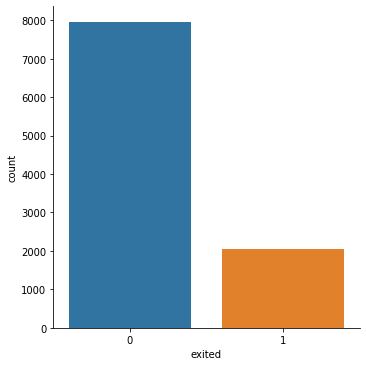

In [63]:
sns.catplot(data=df, x='exited', kind='count')
plt.show()

В предоставленных данных наблюдается дисбаланс классов. На данном этапе обучим модели без учёта дисбаланса.

### Логистическая регрессия

In [64]:
best_f1_logistic_regression = 0
for solver_type in ['newton-cg', 'lbfgs', 'liblinear']:
    model = LogisticRegression(solver=solver_type, max_iter=400, random_state=12345)
    model.fit(features_train, target_train)
    predictions = model.predict(features_valid)
    f1 = f1_score(target_valid, predictions)
    probabilities_one_valid = model.predict_proba(features_valid)[:, 1]
    auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
    print(f'solver_type = {solver_type}, F1 = {f1:.4f}, ROC AUC = {auc_roc:.4f}')
    if f1 > best_f1_logistic_regression:
        best_f1_logistic_regression = f1

solver_type = newton-cg, F1 = 0.3013, ROC AUC = 0.7703
solver_type = lbfgs, F1 = 0.3013, ROC AUC = 0.7703
solver_type = liblinear, F1 = 0.3013, ROC AUC = 0.7703


Значение F1-меры примерно одинаково для всех алгоритмов логической регрессии - около 0,3, метрики ROC AUC - 0,77

### Дерево решений

Посмотрим, какие результаты даст дерево решений.

In [65]:
model = DecisionTreeClassifier(random_state=12345)
model.fit(features_train, target_train)
predictions = model.predict(features_valid)
print('F1 =', round(f1_score(target_valid, predictions), 4))

F1 = 0.4839


Значение F1-меры для дерева решений выше, чем для логистической регрессии даже без подбора параметров. Попробую подобрать более оптимальные параметры.

Изучаю, как влияет на качество модели по метрике F1 значения различных параметров.

In [66]:
for depth in range(2, 20):
    model = DecisionTreeClassifier(max_depth=depth, random_state=12345)
    model.fit(features_train, target_train)
    predictions = model.predict(features_valid)
    f1 = f1_score(target_valid, predictions)
    print(f'max_depth = {depth}, F1 = {f1:.4f}')

max_depth = 2, F1 = 0.5037
max_depth = 3, F1 = 0.3938
max_depth = 4, F1 = 0.4302
max_depth = 5, F1 = 0.5488
max_depth = 6, F1 = 0.5113
max_depth = 7, F1 = 0.5584
max_depth = 8, F1 = 0.5399
max_depth = 9, F1 = 0.5357
max_depth = 10, F1 = 0.5384
max_depth = 11, F1 = 0.5132
max_depth = 12, F1 = 0.5080
max_depth = 13, F1 = 0.4966
max_depth = 14, F1 = 0.5080
max_depth = 15, F1 = 0.4993
max_depth = 16, F1 = 0.5065
max_depth = 17, F1 = 0.4917
max_depth = 18, F1 = 0.4855
max_depth = 19, F1 = 0.4975


In [67]:
for samples_split in range(2, 250, 10):
    model = DecisionTreeClassifier(max_depth=7, min_samples_split=samples_split, random_state=12345)
    model.fit(features_train, target_train)
    predictions = model.predict(features_valid)
    f1 = f1_score(target_valid, predictions)
    print(f'samples_split = {samples_split}, F1 = {f1:.4f}')

samples_split = 2, F1 = 0.5584
samples_split = 12, F1 = 0.5575
samples_split = 22, F1 = 0.5575
samples_split = 32, F1 = 0.5561
samples_split = 42, F1 = 0.5390
samples_split = 52, F1 = 0.5368
samples_split = 62, F1 = 0.5368
samples_split = 72, F1 = 0.5368
samples_split = 82, F1 = 0.5368
samples_split = 92, F1 = 0.5419
samples_split = 102, F1 = 0.5535
samples_split = 112, F1 = 0.5535
samples_split = 122, F1 = 0.5666
samples_split = 132, F1 = 0.5666
samples_split = 142, F1 = 0.5753
samples_split = 152, F1 = 0.5753
samples_split = 162, F1 = 0.5753
samples_split = 172, F1 = 0.5774
samples_split = 182, F1 = 0.5774
samples_split = 192, F1 = 0.5774
samples_split = 202, F1 = 0.5494
samples_split = 212, F1 = 0.5494
samples_split = 222, F1 = 0.5183
samples_split = 232, F1 = 0.5183
samples_split = 242, F1 = 0.5183


In [68]:
for samples_leaf in range(2, 50, 2):
    model = DecisionTreeClassifier(max_depth=7, min_samples_leaf=samples_leaf, random_state=rnd_state)
    model.fit(features_train, target_train)
    predictions = model.predict(features_valid)
    f1 = f1_score(target_valid, predictions)
    print(f'samples_leaf = {samples_leaf}, F1 = {f1:.4f}')

samples_leaf = 2, F1 = 0.5592
samples_leaf = 4, F1 = 0.5584
samples_leaf = 6, F1 = 0.5566
samples_leaf = 8, F1 = 0.5647
samples_leaf = 10, F1 = 0.5566
samples_leaf = 12, F1 = 0.5635
samples_leaf = 14, F1 = 0.5626
samples_leaf = 16, F1 = 0.5617
samples_leaf = 18, F1 = 0.5489
samples_leaf = 20, F1 = 0.5446
samples_leaf = 22, F1 = 0.5410
samples_leaf = 24, F1 = 0.5410
samples_leaf = 26, F1 = 0.5419
samples_leaf = 28, F1 = 0.5404
samples_leaf = 30, F1 = 0.5404
samples_leaf = 32, F1 = 0.5318
samples_leaf = 34, F1 = 0.5460
samples_leaf = 36, F1 = 0.5460
samples_leaf = 38, F1 = 0.5688
samples_leaf = 40, F1 = 0.5688
samples_leaf = 42, F1 = 0.5521
samples_leaf = 44, F1 = 0.5152
samples_leaf = 46, F1 = 0.5097
samples_leaf = 48, F1 = 0.5140


In [69]:
parameters_grid = {
    'max_depth': range(5, 13),
    'min_samples_split': range(100, 200, 10),
    'min_samples_leaf': range(2, 42, 2)    
}

model = DecisionTreeClassifier()
grid_cv = GridSearchCV(model, parameters_grid, scoring='f1', verbose=1, n_jobs=-1)
grid_cv.fit(features_train, target_train)

Fitting 5 folds for each of 1600 candidates, totalling 8000 fits


GridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 13),
                         'min_samples_leaf': range(2, 42, 2),
                         'min_samples_split': range(100, 200, 10)},
             scoring='f1', verbose=1)

In [70]:
grid_cv.best_params_

{'max_depth': 12, 'min_samples_leaf': 4, 'min_samples_split': 100}

In [71]:
model_tree = DecisionTreeClassifier(**grid_cv.best_params_, random_state=rnd_state)
model_tree.fit(features_train, target_train)
predictions = model_tree.predict(features_valid)
f1_tree = f1_score(target_valid, predictions)
probabilities_one_valid = model_tree.predict_proba(features_valid)[:, 1]
auc_roc_tree = roc_auc_score(target_valid, probabilities_one_valid)
print(f'Best decision tree model metrics: F1 = {f1_tree:.4f}, ROC AUC = {auc_roc_tree:.4f}')

Best decision tree model metrics: F1 = 0.5706, ROC AUC = 0.8352


Результат намного лучше, чем с логистической регрессией.

### Случайный лес

Смотрю, какое значение F1-меры получится у модели с алгоритмом случайный лес с параметрами по умолчанию.

In [72]:
model = RandomForestClassifier(random_state=rnd_state)
model.fit(features_train, target_train)
predictions = model.predict(features_valid)
probabilities_one_valid = model_tree.predict_proba(features_valid)[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print(f'F1 = {f1:.4f}, ROC AUC = {auc_roc:.4f}')

F1 = 0.5140, ROC AUC = 0.8352


Значение F1-меры для случайного леса с параметрами по умолчанию похуже, чем у дерева решений с подобранными параметрами. Попробую подобрать оптимальные параметры для случайного леса.

In [73]:
f1_list = [ ]
for n in range(10, 400, 10):
    model = RandomForestClassifier(n_estimators=n, random_state=rnd_state, n_jobs=-1)
    model.fit(features_train, target_train)
    predictions = model.predict(features_valid)
    f1_list.append(f1_score(target_valid, predictions))

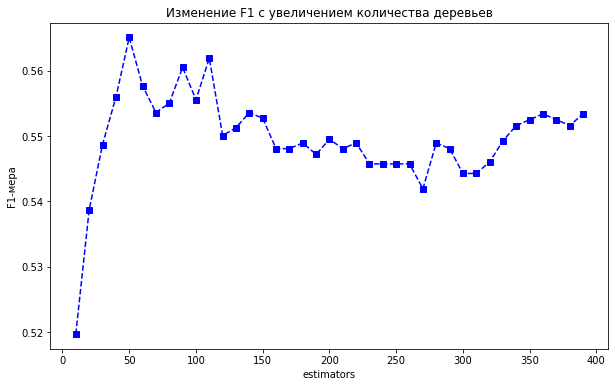

In [74]:
estimators_list = range(10, 400, 10)
plt.figure(figsize=(10, 6))
plt.xlabel('estimators')
plt.ylabel('F1-мера')
plt.title('Изменение F1 c увеличением количества деревьев')
plt.plot(estimators_list, f1_list, 'bs--')
plt.show()

С увеличением количества деревьев качество модели будет расти. По графику видно, что для оптимального качества достаточно взять диапазон количества деревьев примерно от 100 до 150.

In [75]:
for features in range(4, 12):
    model = RandomForestClassifier(max_features=features, random_state=rnd_state)
    model.fit(features_train, target_train)
    predictions = model.predict(features_valid)
    f1 = f1_score(target_valid, predictions)
    print(f'max_features = {features}, F1 = {f1:.4f}')

max_features = 4, F1 = 0.5460
max_features = 5, F1 = 0.5557
max_features = 6, F1 = 0.5580
max_features = 7, F1 = 0.5573
max_features = 8, F1 = 0.5526
max_features = 9, F1 = 0.5478
max_features = 10, F1 = 0.5585
max_features = 11, F1 = 0.5576


In [76]:
for depth in range(5, 35):
    model = RandomForestClassifier(max_depth=depth, random_state=rnd_state, n_jobs=-1)
    model.fit(features_train, target_train)
    predictions = model.predict(features_valid)
    f1 = f1_score(target_valid, predictions)
    print(f'max_depth = {depth}, F1 = {f1:.4f}')

max_depth = 5, F1 = 0.4528
max_depth = 6, F1 = 0.5140
max_depth = 7, F1 = 0.5223
max_depth = 8, F1 = 0.5403
max_depth = 9, F1 = 0.5415
max_depth = 10, F1 = 0.5482
max_depth = 11, F1 = 0.5452
max_depth = 12, F1 = 0.5481
max_depth = 13, F1 = 0.5499
max_depth = 14, F1 = 0.5539
max_depth = 15, F1 = 0.5692
max_depth = 16, F1 = 0.5577
max_depth = 17, F1 = 0.5490
max_depth = 18, F1 = 0.5493
max_depth = 19, F1 = 0.5622
max_depth = 20, F1 = 0.5620
max_depth = 21, F1 = 0.5586
max_depth = 22, F1 = 0.5541
max_depth = 23, F1 = 0.5533
max_depth = 24, F1 = 0.5527
max_depth = 25, F1 = 0.5596
max_depth = 26, F1 = 0.5610
max_depth = 27, F1 = 0.5541
max_depth = 28, F1 = 0.5556
max_depth = 29, F1 = 0.5556
max_depth = 30, F1 = 0.5556
max_depth = 31, F1 = 0.5556
max_depth = 32, F1 = 0.5556
max_depth = 33, F1 = 0.5556
max_depth = 34, F1 = 0.5556


In [77]:
for samples_split in range(2, 50, 2):
    model = RandomForestClassifier(min_samples_split=samples_split, random_state=rnd_state, n_jobs=-1)
    model.fit(features_train, target_train)
    predictions = model.predict(features_valid)
    f1 = f1_score(target_valid, predictions)
    print(f'min_samples_split = {samples_split}, F1 = {f1:.4f}')

min_samples_split = 2, F1 = 0.5556
min_samples_split = 4, F1 = 0.5425
min_samples_split = 6, F1 = 0.5457
min_samples_split = 8, F1 = 0.5510
min_samples_split = 10, F1 = 0.5508
min_samples_split = 12, F1 = 0.5458
min_samples_split = 14, F1 = 0.5556
min_samples_split = 16, F1 = 0.5557
min_samples_split = 18, F1 = 0.5599
min_samples_split = 20, F1 = 0.5636
min_samples_split = 22, F1 = 0.5557
min_samples_split = 24, F1 = 0.5603
min_samples_split = 26, F1 = 0.5566
min_samples_split = 28, F1 = 0.5590
min_samples_split = 30, F1 = 0.5525
min_samples_split = 32, F1 = 0.5463
min_samples_split = 34, F1 = 0.5478
min_samples_split = 36, F1 = 0.5493
min_samples_split = 38, F1 = 0.5554
min_samples_split = 40, F1 = 0.5539
min_samples_split = 42, F1 = 0.5554
min_samples_split = 44, F1 = 0.5446
min_samples_split = 46, F1 = 0.5507
min_samples_split = 48, F1 = 0.5446


In [78]:
for samples_leaf in range(1, 30):
    model = RandomForestClassifier(min_samples_leaf=samples_leaf, random_state=rnd_state, n_jobs=-1)
    model.fit(features_train, target_train)
    predictions = model.predict(features_valid)
    f1 = f1_score(target_valid, predictions)
    print(f'min_samples_leaf = {samples_leaf}, F1 = {f1:.4f}')

min_samples_leaf = 1, F1 = 0.5556
min_samples_leaf = 2, F1 = 0.5437
min_samples_leaf = 3, F1 = 0.5528
min_samples_leaf = 4, F1 = 0.5526
min_samples_leaf = 5, F1 = 0.5493
min_samples_leaf = 6, F1 = 0.5532
min_samples_leaf = 7, F1 = 0.5479
min_samples_leaf = 8, F1 = 0.5563
min_samples_leaf = 9, F1 = 0.5539
min_samples_leaf = 10, F1 = 0.5376
min_samples_leaf = 11, F1 = 0.5568
min_samples_leaf = 12, F1 = 0.5502
min_samples_leaf = 13, F1 = 0.5458
min_samples_leaf = 14, F1 = 0.5410
min_samples_leaf = 15, F1 = 0.5367
min_samples_leaf = 16, F1 = 0.5479
min_samples_leaf = 17, F1 = 0.5449
min_samples_leaf = 18, F1 = 0.5409
min_samples_leaf = 19, F1 = 0.5424
min_samples_leaf = 20, F1 = 0.5497
min_samples_leaf = 21, F1 = 0.5458
min_samples_leaf = 22, F1 = 0.5369
min_samples_leaf = 23, F1 = 0.5360
min_samples_leaf = 24, F1 = 0.5327
min_samples_leaf = 25, F1 = 0.5320
min_samples_leaf = 26, F1 = 0.5212
min_samples_leaf = 27, F1 = 0.5219
min_samples_leaf = 28, F1 = 0.5360
min_samples_leaf = 29, F1 = 0

Выбираю и задаю диапазоны параметров для поиска оптимальной модели с помощью `GridSearchCV`

**Строка с запуском `GridSearchCV` закомментирована**, т.к. выполнение занимает много времени (делаю проект локально, на моём ноуте на выполнение ушло около часа). Параметры, найденные с помощью `GridSearchCV`, зафиксированы.

In [79]:
parameters_grid = {
    'n_estimators': range(170, 250, 10),
    'max_features': range(5, 8),
    'max_depth': range(18, 22, 2),
    'min_samples_split': range(20, 28, 2),
    'min_samples_leaf': range(6, 9)    
}

model = RandomForestClassifier()
# grid_cv = GridSearchCV(model, parameters_grid, scoring='roc_auc', verbose=2, n_jobs=-1, cv=3)
# grid_cv.fit(features_train, target_train)

С помощью `GridSearchCV` были найдены такие параметры случайного леса:
- 'max_depth': 18,
- 'max_features': 5,
- 'min_samples_leaf': 6,
- 'min_samples_split': 24,
- 'n_estimators': 170

In [80]:
model_forest_grid = RandomForestClassifier(
    max_depth=18, max_features=5, min_samples_leaf=6, min_samples_split=24,
    n_estimators=170, random_state=rnd_state
)

model_forest_grid.fit(features_train, target_train)
predictions = model_forest_grid.predict(features_valid)
f1_forest_grid = f1_score(target_valid, predictions)
probabilities_one_valid = model_forest_grid.predict_proba(features_valid)[:, 1]
auc_roc_forest_grid = roc_auc_score(target_valid, probabilities_one_valid)
print(f'Grid random forest model metrics: F1 = {f1_forest_grid:.4f}, ROC AUC = {auc_roc_forest_grid:.4f}')

Grid random forest model metrics: F1 = 0.5561, ROC AUC = 0.8536


Значение F1 получилось похуже, чем у дерева, но AUC ROC при этом заметно выше. По сравнению с параметрами по умолчанию обе метрики выше.

### Catboost

In [99]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [111]:
from catboost import CatBoostClassifier, Pool

Для catboost не нужно масштабирование признаков и OneHotEncoding. Создаю отдельные train, valid и test выборки для него

In [106]:
features

,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active,salary
0,619,France,Female,42,2,0,1,1,1,101349
1,608,Spain,Female,41,1,83808,1,0,1,112543
2,502,France,Female,42,8,159661,3,1,0,113932
3,699,France,Female,39,1,0,2,0,0,93827
4,850,Spain,Female,43,2,125511,1,1,1,79085
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0,2,1,0,96271
9996,516,France,Male,35,10,57370,1,1,1,101700
9997,709,France,Female,36,7,0,1,0,1,42086
9998,772,Germany,Male,42,3,75076,2,1,0,92889


In [107]:
features_train_cat, features_test_cat, target_train_cat, target_test_cat = train_test_split(
     features, target, test_size=0.2, random_state=12345)

features_train_cat, features_valid_cat, target_train_cat, target_valid_cat = train_test_split(
    features_train_cat, target_train_cat, test_size=0.25, random_state=12345)

In [108]:
cat_cols

['geography', 'gender']

In [109]:
num_cols

['credit_score', 'age', 'balance', 'tenure', 'salary', 'num_of_products']

In [112]:
train_dataset = Pool(features_train_cat, target_train_cat, cat_features=cat_cols)
val_dataset = Pool(features_valid_cat, target_valid_cat, cat_features=cat_cols)

In [113]:
model_cat = CatBoostClassifier(
    eval_metric='AUC',
    random_seed=rnd_state)

In [114]:
model_cat.fit(
    train_dataset,
    eval_set=val_dataset,
    verbose=100
)

Learning rate set to 0.04933
0:	test: 0.7640820	best: 0.7640820 (0)	total: 208ms	remaining: 3m 28s
100:	test: 0.8683683	best: 0.8684271 (99)	total: 3.89s	remaining: 34.6s
200:	test: 0.8682459	best: 0.8693745 (159)	total: 7.56s	remaining: 30s
300:	test: 0.8664307	best: 0.8693745 (159)	total: 11.4s	remaining: 26.5s
400:	test: 0.8646250	best: 0.8693745 (159)	total: 15.3s	remaining: 22.8s
500:	test: 0.8632103	best: 0.8693745 (159)	total: 19.1s	remaining: 19.1s
600:	test: 0.8608371	best: 0.8693745 (159)	total: 23s	remaining: 15.3s
700:	test: 0.8606686	best: 0.8693745 (159)	total: 26.9s	remaining: 11.5s
800:	test: 0.8587151	best: 0.8693745 (159)	total: 30.7s	remaining: 7.63s
900:	test: 0.8581953	best: 0.8693745 (159)	total: 34.6s	remaining: 3.8s
999:	test: 0.8572448	best: 0.8693745 (159)	total: 38.4s	remaining: 0us

bestTest = 0.8693744745
bestIteration = 159

Shrink model to first 160 iterations.


In [115]:
predictions = model_cat.predict(features_valid_cat)
f1_cat = f1_score(target_valid_cat, predictions)
probabilities_one_valid = model_cat.predict_proba(features_valid_cat)[:, 1]
auc_roc_cat = roc_auc_score(target_valid_cat, probabilities_one_valid)
print(f'Catboost model metrics: F1 = {f1_cat:.4f}, ROC AUC = {auc_roc_cat:.4f}')

Catboost model metrics: F1 = 0.5802, ROC AUC = 0.8694


Значения метрик F1 и ROC AUC у модели Catboost самые высокие.

### Вывод

Без учёта дисбаланса классов, удалось достичь следующих результатов для моделей:

In [118]:
print(f'Best decision tree model metrics: F1 = {f1_tree:.4f}, ROC AUC = {auc_roc_tree:.4f}')
print(f'Best random forest model metrics: F1 = {f1_forest_grid:.4f}, ROC AUC = {auc_roc_forest_grid:.4f}')
print(f'Best catboost model metrics:      F1 = {f1_cat:.4f}, ROC AUC = {auc_roc_cat:.4f}')

Best decision tree model metrics: F1 = 0.5706, ROC AUC = 0.8352
Best random forest model metrics: F1 = 0.5561, ROC AUC = 0.8536
Best catboost model metrics:      F1 = 0.5802, ROC AUC = 0.8694


Значение F1-меры ни у одной модели не дотягивает до требуемого в задаче минимального значения `0,59`. Следующий шаг - учесть дисбаланс классов и попробовать улучшить модели.

## Дисбаланс классов

### Взвешивание классов

Посмотрю, как изменится качество моделей при использовании параметра `class_weight='balanced'`

In [82]:
model_tree_weight = DecisionTreeClassifier(
    max_depth=10, min_samples_leaf=8, min_samples_split=100, class_weight='balanced', random_state=rnd_state
)
model_tree_weight.fit(features_train, target_train)
predictions = model_tree_weight.predict(features_valid)
f1_tree_weight = f1_score(target_valid, predictions)
probabilities_one_valid = model_tree_weight.predict_proba(features_valid)[:, 1]
auc_roc_tree_weight = roc_auc_score(target_valid, probabilities_one_valid)
print(f'Decision tree model metrics without class weight:\n F1 = {f1_tree:.4f}, ROC AUC = {auc_roc_tree:.4f}\n')
print(f'Decision tree model metrics with class weight:\n F1 = {f1_tree_weight:.4f}, ROC AUC = {auc_roc_tree_weight:.4f}')

Decision tree model metrics without class weight:
 F1 = 0.5706, ROC AUC = 0.8352

Decision tree model metrics with class weight:
 F1 = 0.5301, ROC AUC = 0.8139


Для дерева решений использование параметра `class_weight='balanced'` ухудшило значения метрик.

In [83]:
model_forest_weight = RandomForestClassifier(
    max_depth=18, max_features=5, min_samples_leaf=6, min_samples_split=24,
    n_estimators=170, class_weight='balanced', random_state=rnd_state
)
model_forest_weight.fit(features_train, target_train)
predictions = model_forest_weight.predict(features_valid)
f1_forest_weight = f1_score(target_valid, predictions)
probabilities_one_valid = model_forest_weight.predict_proba(features_valid)[:, 1]
auc_roc_forest_weight = roc_auc_score(target_valid, probabilities_one_valid)
print(f'Random forest model metrics without class weight:\n F1 = {f1_forest_grid:.4f}, ROC AUC = {auc_roc_forest_grid:.4f}\n')
print(f'Random forest model metrics with class weight:\n F1 = {f1_forest_weight:.4f}, ROC AUC = {auc_roc_forest_weight:.4f}')

Random forest model metrics without class weight:
 F1 = 0.5561, ROC AUC = 0.8536

Random forest model metrics with class weight:
 F1 = 0.6077, ROC AUC = 0.8548


Для случайного леса значение F1-меры при использовании параметра `class_weight='balanced'` значительно повысилось и даже достигло требуемого в задаче значения.

In [122]:
model_cat_weight = CatBoostClassifier(
    eval_metric='AUC',
    auto_class_weights='Balanced',
    random_seed=rnd_state)

In [123]:
model_cat_weight.fit(
    train_dataset,
    eval_set=val_dataset,
    verbose=100
)

Learning rate set to 0.04933
0:	test: 0.8015344	best: 0.8015344 (0)	total: 22.6ms	remaining: 22.6s
100:	test: 0.8688102	best: 0.8688102 (100)	total: 3.76s	remaining: 33.5s
200:	test: 0.8689135	best: 0.8698036 (163)	total: 7.5s	remaining: 29.8s
300:	test: 0.8652433	best: 0.8698036 (163)	total: 11.4s	remaining: 26.6s
400:	test: 0.8640957	best: 0.8698036 (163)	total: 15.4s	remaining: 23s
500:	test: 0.8615031	best: 0.8698036 (163)	total: 19.4s	remaining: 19.3s
600:	test: 0.8589297	best: 0.8698036 (163)	total: 23.3s	remaining: 15.4s
700:	test: 0.8570175	best: 0.8698036 (163)	total: 27.3s	remaining: 11.6s
800:	test: 0.8555806	best: 0.8698036 (163)	total: 31.2s	remaining: 7.75s
900:	test: 0.8548669	best: 0.8698036 (163)	total: 35.2s	remaining: 3.86s
999:	test: 0.8542708	best: 0.8698036 (163)	total: 39.1s	remaining: 0us

bestTest = 0.8698036461
bestIteration = 163

Shrink model to first 164 iterations.


In [124]:
predictions = model_cat_weight.predict(features_valid_cat)
f1_cat_weight = f1_score(target_valid_cat, predictions)
probabilities_one_valid = model_cat_weight.predict_proba(features_valid_cat)[:, 1]
auc_roc_cat_weight = roc_auc_score(target_valid_cat, probabilities_one_valid)
print(f'Catboost model metrics without class weight: F1 = {f1_cat:.4f}, ROC AUC = {auc_roc_cat:.4f}')
print(f'Catboost model metrics with class weight: F1 = {f1_cat_weight:.4f}, ROC AUC = {auc_roc_cat_weight:.4f}')

Catboost model metrics without class weight: F1 = 0.5802, ROC AUC = 0.8694
Catboost model metrics with class weight: F1 = 0.5932, ROC AUC = 0.8698


Для модели Catboost значение метрики F1 заметно повысилось с использованием `auto_class_weights='Balanced'`

### Upsampling

Провожу `upsampling` - увеличиваю количество объектов редкого класса - ушедших клиентов.

In [84]:
features_train[target_train == 0]['credit_score'].count() / features_train[target_train == 1]['credit_score'].count()

3.922067268252666

In [85]:
repeat = 4

features_train_upsampled = pd.concat(
    [features_train[target_train == 0]] + [features_train[target_train == 1]] * repeat
)
target_train_upsampled = pd.concat(
    [target_train[target_train == 0]] + [target_train[target_train == 1]] * repeat
)
    
features_train_upsampled, target_train_upsampled = shuffle(
    features_train_upsampled, target_train_upsampled, random_state=12345
)

In [86]:
features_train_upsampled[target_train_upsampled == 1]['credit_score'].count()

4876

In [87]:
features_train_upsampled[target_train_upsampled == 0]['credit_score'].count()

4781

In [88]:
model_tree.fit(features_train_upsampled, target_train_upsampled)
predictions = model_tree.predict(features_valid)
f1_tree_ups = f1_score(target_valid, predictions)
probabilities_one_valid = model_tree.predict_proba(features_valid)[:, 1]
auc_roc_tree_ups = roc_auc_score(target_valid, probabilities_one_valid)
print(f'Decision tree model with upsampling: F1 = {f1_tree_ups:.4f}, ROC AUC = {auc_roc_tree_ups:.4f}')

Decision tree model with upsampling: F1 = 0.5283, ROC AUC = 0.7947


In [89]:
model_forest_grid.fit(features_train_upsampled, target_train_upsampled)
predictions = model_forest_grid.predict(features_valid)
f1_forest_ups = f1_score(target_valid, predictions)
probabilities_one_valid = model_forest_grid.predict_proba(features_valid)[:, 1]
auc_roc_forest_ups = roc_auc_score(target_valid, probabilities_one_valid)
print(f'Random forest model with upsampling: F1 = {f1_forest_ups:.4f}, ROC AUC = {auc_roc_forest_ups:.4f}')

Random forest model with upsampling: F1 = 0.5953, ROC AUC = 0.8497


Использование upsampling не дало лучших результатов.

### Downsampling

In [90]:
features_train[target_train == 1]['credit_score'].count() / features_train[target_train == 0]['credit_score'].count()

0.25496758000418324

In [91]:
fraction = 0.25
features_train_downsampled = pd.concat(
    [features_train[target_train == 0].sample(frac=fraction, random_state=rnd_state)] + [features_train[target_train == 1]]
)
target_train_downsampled = pd.concat(
    [target_train[target_train == 0].sample(frac=fraction, random_state=rnd_state)] + [target_train[target_train == 1]]
)
    
features_train_downsampled, target_train_downsampled = shuffle(
    features_train_downsampled, target_train_downsampled, random_state=rnd_state
)

In [92]:
model_tree.fit(features_train_downsampled, target_train_downsampled)
predictions = model_tree.predict(features_valid)
f1_tree_downs = f1_score(target_valid, predictions)
probabilities_one_valid = model_tree.predict_proba(features_valid)[:, 1]
auc_roc_tree_downs = roc_auc_score(target_valid, probabilities_one_valid)
print(f'Decision tree model with downsampling: F1 = {f1_tree_downs:.4f}, ROC AUC = {auc_roc_tree_downs:.4f}')

Decision tree model with downsampling: F1 = 0.5429, ROC AUC = 0.8249


In [93]:
model_forest_grid.fit(features_train_downsampled, target_train_downsampled)
predictions = model_forest_grid.predict(features_valid)
f1_forest_downs = f1_score(target_valid, predictions)
probabilities_one_valid = model_forest_grid.predict_proba(features_valid)[:, 1]
auc_roc_forest_downs = roc_auc_score(target_valid, probabilities_one_valid)
print(f'Random forest model with downsampling: F1 = {f1_forest_downs:.4f}, ROC AUC = {auc_roc_forest_downs:.4f}')

Random forest model with downsampling: F1 = 0.5714, ROC AUC = 0.8520


Использование downsampling не дало лучших результатов.

### Изменение порога

Беру наилучшую модель - Catboost с балансировкой классов - и смотрю, какие значения метрик можно получить с помощью изменения порога.

In [127]:
probabilities_valid = model_cat_weight.predict_proba(features_valid_cat)
probabilities_one_valid = probabilities_valid[:, 1]

for threshold in np.arange(0.3, 0.71, 0.01):
    predicted_valid = probabilities_one_valid > threshold 
    f1 = f1_score(target_valid_cat, predicted_valid)
    precision = precision_score(target_valid_cat, predicted_valid) 
    recall = recall_score(target_valid_cat, predicted_valid) 

    print(f'Порог = {threshold:.2f} | F1 = {f1:.3f} | Recall = {recall:.3f} | Precision = {precision:.3f}')

Порог = 0.30 | F1 = 0.508 | Recall = 0.898 | Precision = 0.354
Порог = 0.31 | F1 = 0.516 | Recall = 0.893 | Precision = 0.363
Порог = 0.32 | F1 = 0.521 | Recall = 0.887 | Precision = 0.369
Порог = 0.33 | F1 = 0.524 | Recall = 0.882 | Precision = 0.373
Порог = 0.34 | F1 = 0.532 | Recall = 0.882 | Precision = 0.381
Порог = 0.35 | F1 = 0.540 | Recall = 0.877 | Precision = 0.390
Порог = 0.36 | F1 = 0.543 | Recall = 0.864 | Precision = 0.395
Порог = 0.37 | F1 = 0.540 | Recall = 0.849 | Precision = 0.396
Порог = 0.38 | F1 = 0.543 | Recall = 0.836 | Precision = 0.402
Порог = 0.39 | F1 = 0.553 | Recall = 0.829 | Precision = 0.415
Порог = 0.40 | F1 = 0.556 | Recall = 0.821 | Precision = 0.420
Порог = 0.41 | F1 = 0.561 | Recall = 0.813 | Precision = 0.429
Порог = 0.42 | F1 = 0.562 | Recall = 0.801 | Precision = 0.434
Порог = 0.43 | F1 = 0.568 | Recall = 0.793 | Precision = 0.443
Порог = 0.44 | F1 = 0.574 | Recall = 0.785 | Precision = 0.452
Порог = 0.45 | F1 = 0.577 | Recall = 0.775 | Precision 

Наилучшее значение F1-меры можно получить, используя порог `0,65`.

В таком случае **метрика F1 составит `0,635`**, полнота при этом `0,606`, а точность `0,668`

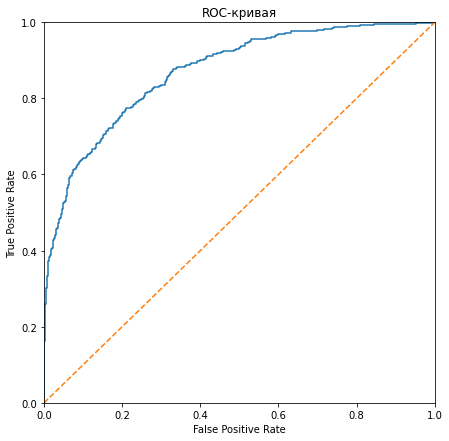

In [128]:
probabilities_valid = model_cat_weight.predict_proba(features_valid_cat)
probabilities_one_valid = probabilities_valid[:, 1]

fpr, tpr, thresholds = roc_curve(target_valid_cat, probabilities_one_valid)

plt.figure(figsize=(7, 7))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')

plt.show()

In [129]:
auc_roc = roc_auc_score(target_valid_cat, probabilities_one_valid)
print(f'Значение метрики AUC ROC: {auc_roc:.3f}')

Значение метрики AUC ROC: 0.870


In [131]:
from scipy import interpolate
tpr_intrp = interpolate.interp1d(thresholds, tpr)
fpr_intrp = interpolate.interp1d(thresholds, fpr)

print('Интерполяция по графику, значения метрик при пороге 0,65')
print(f'TPR = {tpr_intrp(0.54):.3f}')
print(f'FPR = {fpr_intrp(0.54):.3f}')

Интерполяция по графику, значения метрик при пороге 0,65
TPR = 0.691
FPR = 0.147


На графике - ROC кривая выбранной модели, которая отражает изменение значений метрик TPR (она же полнота, Recall) и FPR при различных порогах. Для порога `0,65` и TPR `0,69` доля ложных положительных ответов составит около `0,15`.

### Вывод

С помощью взвешивания классов и изменения порога удалось улучшить значение F1-меры для модели случайного леса до `0,635`. Если модель пройдёт тестирование, требование к значению метрики выполнено.

## Тестирование

In [133]:
predicted_test = (model_cat_weight.predict_proba(features_test_cat)[:, 1] > 0.65).astype(bool)
f1_test = f1_score(target_test_cat, predicted_test)
print(f'Значение F1-меры на тестовой выборке: {f1_test:.3f}')
roc_auc_test = roc_auc_score(target_test, model_cat_weight.predict_proba(features_test_cat)[:, 1])
print(f'Значение ROC_AUC на тестовой выборке: {roc_auc_test:.3f}')

Значение F1-меры на тестовой выборке: 0.672
Значение ROC_AUC на тестовой выборке: 0.879


Модель прошла тестирование, значение F1-меры на тестовой выборке удовлетворяет требованиям задачи.

## Общий вывод

Были предоставлены исторические данные о поведении клиентов "Бета-Банка" и расторжении договоров. Поставлена задача - построить модель, предсказывающую уход клиента из банка. Требования к качеству модели - значение метрики F1-меры не менее `0,59`.

* Данные были предобработаны: заполнены пропуски, выделены и подготовлены признаки - категориальные переведены в численные, количественные стандартизованы.


* Проведено исследование задачи без учёта дисбаланса классов. Рассмотрены модели с алгоритмами логистической регресии, дерева решений, случайного леса, градиентного бустинга (catboost). Подобраны параметры для обучения, дающие наиболее высокий результат по заданной метрике.


* Затем проведено улучшение моделей с учётом дисбаланса классов. С помощью взвешивания классов улучшена **модель catboost**. Построен график ROC-кривой для модели, вычислена AUC ROC.


* Выбран порог `0,65`, позволяющий достичь следующих значений метрик для предсказаний модели:
    - F1-мера = `0,635`
    - TPR, Recall = `0,69`
    - FPR = `0,15`


* Выбранная модель успешно прошла проверку на тестовой выборке.